In [30]:
import numpy as np

from tqdm import tqdm, trange

import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader

from torchvision.transforms import ToTensor
from torchvision.datasets.mnist import MNIST
import cv2
import matplotlib.pyplot as plt 
np.random.seed(0)
torch.manual_seed(0)

In [31]:
def patchify(images, n_patches):
    n, c, h, w = images.shape
    assert h == w, "Patchify method is implemented for square images only"

    patches = torch.zeros(n, n_patches ** 2, h * w * c // n_patches ** 2)
    patch_size = h // n_patches

    for idx, image in enumerate(images):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = image[:, i * patch_size: (i + 1) * patch_size, j * patch_size: (j + 1) * patch_size]
                patches[idx, i * n_patches + j] = patch.flatten()
    return patches

In [48]:
image = cv2.imread('./exp_ganzo.png')
image = cv2.resize(image, (224,224))
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
#image = np.transpose(image,(2,0,1))
image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print(image_tensor.shape)
patches = patchify(image_tensor, 4)
print(patches.shape)

(224, 224)
torch.Size([1, 1, 224, 224])
torch.Size([1, 16, 3136])


In [49]:
def show_patches_as_images(patches):
    batch_size, num_patches, patch_size_squared = patches.shape
    patch_size = int(patch_size_squared ** 0.5)

    for i in range(batch_size):
        for j in range(num_patches):
            patch = patches[i, j].view(patch_size, patch_size)
            plt.subplot(batch_size, num_patches, i * num_patches + j + 1)
            plt.imshow(patch.numpy().astype('uint8'), cmap='gray')  # Assuming single-channel patches
            plt.axis('off')

    plt.show()

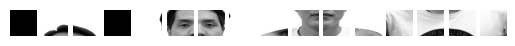

1


In [53]:
show_patches_as_images(patches)

In [51]:
def get_positional_embeddings(sequence_length, d):
    result = torch.ones(sequence_length, d)
    for i in range(sequence_length):
        for j in range(d):
            result[i][j] = np.sin(i / (10000 ** (j / d))) if j % 2 == 0 else np.cos(i / (10000 ** ((j - 1) / d)))
    return result


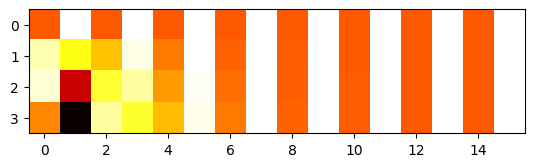

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
          0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  3.1098e-01,  9.5042e-01,  9.9833e-02,
          9.9500e-01,  3.1618e-02,  9.9950e-01,  9.9998e-03,  9.9995e-01,
          3.1623e-03,  9.9999e-01,  1.0000e-03,  1.0000e+00,  3.1623e-04,
          1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  5.9113e-01,  8.0658e-01,  1.9867e-01,
          9.8007e-01,  6.3203e-02,  9.9800e-01,  1.9999e-02,  9.9980e-01,
          6.3245e-03,  9.9998e-01,  2.0000e-03,  1.0000e+00,  6.3246e-04,
          1.0000e+00],
        [ 1.4112e-01, -9.8999e-01,  8.1265e-01,  5.8275e-01,  2.9552e-01,
          9.5534e-01,  9.4726e-02,  9.9550e-01,  2.9996e-02,  9.9955e-01,
          9.4867e-03,  9.9995e-01,  3.0000e-03,  1.0000e+00,  9.4868e-04,
          1.0000e+00]])


In [58]:
result = get_positional_embeddings(4, 16)
plt.imshow(result, cmap="hot", interpolation="nearest")
plt.show()
print(result)